In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Wczytanie danych

In [2]:
student_performance_data = pd.read_csv("student_performance_scaled.csv")

In [3]:
student_performance_data.head()

,Previous Scores,Extracurricular Activities,Hours Studied,Sleep Hours,Sample Question Papers Practiced,Scores
0,0.49,1,0.775188,1.456205,-1.249754,0.41
1,0.32,0,-0.383481,-1.492294,-0.900982,0.15
2,0.01,1,1.161410,0.276805,-0.900982,-0.05
3,0.02,1,0.002742,-0.902594,-0.900982,-0.14
4,0.25,0,0.775188,0.866505,0.145333,0.16


### Podział zbioru

In [4]:
X = student_performance_data.drop(columns=["Scores"])
y = student_performance_data["Scores"]

from sklearn.model_selection import train_test_split

X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
X_valid, X_test, y_valid, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

### Podstawowa sieć

In [6]:
import keras
from keras import layers

c:\Users\Komputer\Documents\KN_Cybertech_kurs\AI_course\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [ ]:
model = keras.Sequential([
    layers.Input(shape=(5,)),
    layers.Dense(64, activation="relu", kernel_initializer="he_normal"),
    layers.Dense(32, activation="relu", kernel_initializer="he_normal"),
    layers.Dense(1, activation="linear")
])

In [8]:
model.summary(
    line_length=None,
    positions=None,
    print_fn=None,
    expand_nested=False,
    show_trainable=False,
    layer_range=None,
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
optimizer = keras.optimizers.Adam(
  learning_rate=0.001
)

In [10]:
model.compile(
    optimizer= optimizer,
    loss="mse"
)

In [11]:
initial_weights = model.get_weights()

In [12]:
history = model.fit(
    X_train, y_train,
    epochs=100,
)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - loss: 0.2326
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 0.0141
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 0.0066
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 0.0046
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.0035
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.0030
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.0025
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.0022
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - loss: 0.0021
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 0.0019
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 0.0018
Epoch 12/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 0.0016
Epoch 13/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.0016
Epoch 14/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 0.0015
Epoch 15/100
21

In [13]:
history.history

{'loss': [0.2325926125049591,
  0.014110601507127285,
  0.006626124028116465,
  0.004566795192658901,
  0.0035398309119045734,
  0.0029531680047512054,
  0.002530136378481984,
  0.002248539822176099,
  0.002099101198837161,
  0.0018841521814465523,
  0.0017584944143891335,
  0.0016453976277261972,
  0.001598605653271079,
  0.0014580778079107404,
  0.0013902995269745588,
  0.0013511499855667353,
  0.0012474724790081382,
  0.0012185388477519155,
  0.0012243794044479728,
  0.001138578518293798,
  0.00113390083424747,
  0.0011996057583019137,
  0.0012509690131992102,
  0.0012184963561594486,
  0.0010652805212885141,
  0.0010050416458398104,
  0.0010505348909646273,
  0.0010822612093761563,
  0.0010655197547748685,
  0.0008957098471000791,
  0.0010017277672886848,
  0.0008764599915593863,
  0.0008950114715844393,
  0.0008676936267875135,
  0.0008202192839235067,
  0.0009018760174512863,
  0.0008397094206884503,
  0.0009279223158955574,
  0.0007763639441691339,
  0.0009363284334540367,
  0.0

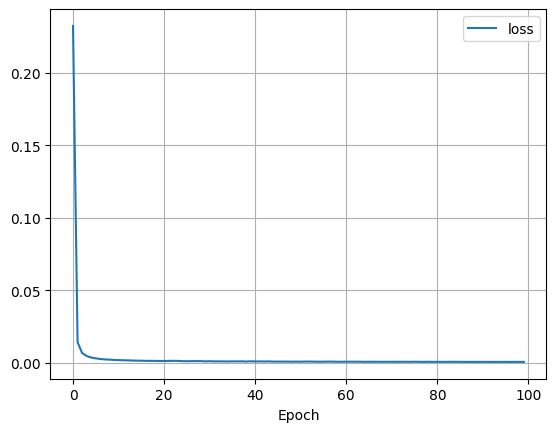

In [14]:
def display_history(history):
  sns.lineplot(history.history)
  plt.grid()
  plt.xlabel("Epoch")

display_history(history)

In [15]:
predictions = model.predict(X_test)

predictions

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step


array([[-0.34659797],
       [ 0.43139338],
       [-0.1104921 ],
       ...,
       [ 0.18421687],
       [ 0.12019365],
       [ 0.3486213 ]], shape=(1500, 1), dtype=float32)

In [16]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions) * 100

print(f"Wynik MAE: {mae:.4f}")

Wynik MAE: 1.8618


### Monitorowanie funkcji straty na zbiorze walidacyjnym

In [17]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer= optimizer,loss="mse")

initial_weights = model.get_weights()

model.set_weights(initial_weights)

In [18]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.2883e-04 - val_loss: 6.0172e-04
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - loss: 5.3554e-04 - val_loss: 5.6284e-04
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 5.1725e-04 - val_loss: 5.3133e-04
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 5.2951e-04 - val_loss: 5.3398e-04
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 5.3103e-04 - val_loss: 5.3099e-04
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 4.9600e-04 - val_loss: 5.3227e-04
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 5.2735e-04 - val_loss: 5.2165e-04
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 5.1939e-04 - val_loss: 4.9289e-04
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 5.1469e-04 - val_loss: 4.9187e-04
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 5.0012e-04 - val_loss: 4.9506e-04
Epoch 11/100
219/219 ━━━━━━━━━━

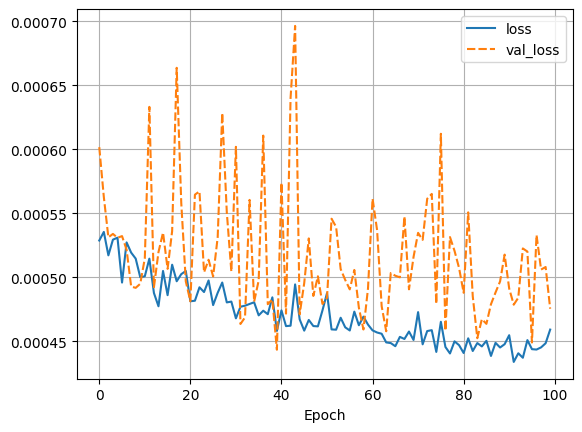

In [19]:
display_history(history)

### Early stopping

In [20]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="mse")

model.set_weights(initial_weights)

In [21]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, monitor="val_loss")

In [22]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.2915e-04 - val_loss: 6.3781e-04
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 5.2345e-04 - val_loss: 4.9782e-04
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - loss: 5.3614e-04 - val_loss: 5.4080e-04
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 5.2752e-04 - val_loss: 5.6305e-04
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - loss: 5.3382e-04 - val_loss: 5.1372e-04
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 5.2054e-04 - val_loss: 7.8559e-04
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 5.0850e-04 - val_loss: 5.2251e-04


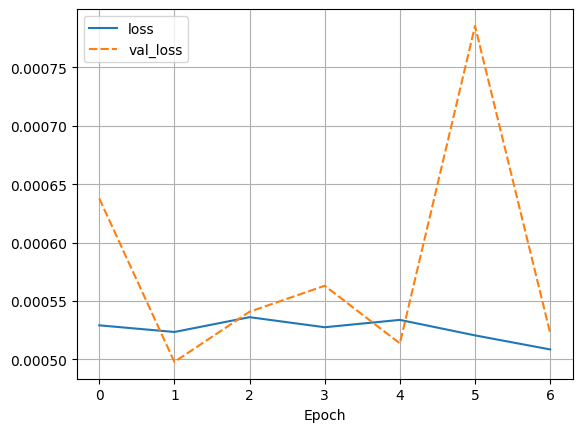

In [23]:
display_history(history)

### Zmniejszanie learning rate’a

In [24]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="mse")

model.set_weights(initial_weights)

In [25]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, monitor="val_loss")
reduce_lr = keras.callbacks.ReduceLROnPlateau(patience=3, factor=0.1, monitor="val_loss")

In [26]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_valid, y_valid), callbacks=[early_stopping, reduce_lr])

Epoch 1/1000
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.4327e-04 - val_loss: 7.8023e-04 - learning_rate: 0.0010
Epoch 2/1000
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 5.2129e-04 - val_loss: 5.2666e-04 - learning_rate: 0.0010
Epoch 3/1000
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 5.2092e-04 - val_loss: 5.1644e-04 - learning_rate: 0.0010
Epoch 4/1000
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 5.1330e-04 - val_loss: 5.6234e-04 - learning_rate: 0.0010
Epoch 5/1000
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2127e-04 - val_loss: 5.6219e-04 - learning_rate: 0.0010
Epoch 6/1000
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 4.1785e-04 - val_loss: 4.6842e-04 - learning_rate: 1.0000e-04
Epoch 7/1000
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 4.0965e-04 - val_loss: 4.6053e-04 - learning_rate: 1.0000e-04
Epoch 8/1000
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 4.0842e-04 - val_loss: 4.9046e-04 - learning_rate: 1.0000e-04
Epoch 9/1000
219

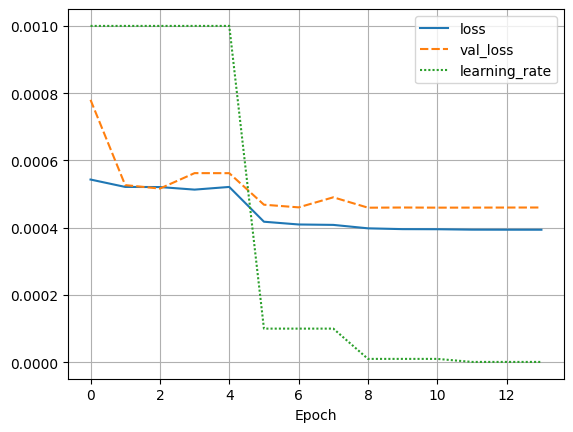

In [27]:
display_history(history)

#### Callback - LearningRateScheduler

In [28]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9
      
lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler)

In [29]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="mse")

model.set_weights(initial_weights)

In [30]:
history_scheduler = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping, lr_scheduler], verbose=1)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.7179e-04 - val_loss: 5.1100e-04 - learning_rate: 0.0010
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 5.2169e-04 - val_loss: 6.1803e-04 - learning_rate: 0.0010
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 5.2082e-04 - val_loss: 5.1625e-04 - learning_rate: 0.0010
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 5.0845e-04 - val_loss: 5.8339e-04 - learning_rate: 0.0010
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 5.3821e-04 - val_loss: 6.0205e-04 - learning_rate: 0.0010


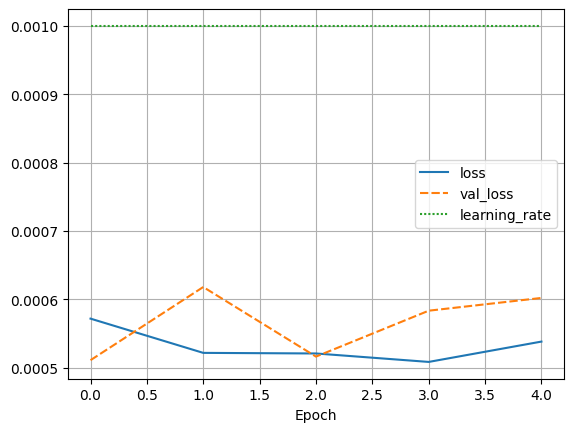

In [31]:
display_history(history_scheduler)

### Test modelu

In [37]:
y_pred_valid = model.predict(X_valid)
y_pred_test = model.predict(X_test)

mae_valid = mean_absolute_error(y_valid, y_pred_valid)
mae_test = mean_absolute_error(y_test, y_pred_test)

diff = abs(mae_valid - mae_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step


In [38]:
print(f"MAE na zbiorze walidacyjnym: {mae_valid:.5f}")
print(f"MAE na zbiorze testowym:     {mae_test:.5f}")

print(f"Różnica: {diff:.5f}")

MAE na zbiorze walidacyjnym: 0.01963
MAE na zbiorze testowym:     0.01874
Różnica: 0.00089
